# Flight Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot
import cufflinks as cf
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Automated EDA

In [5]:
# import pandas_profiling as pp

In [6]:
# pp.ProfileReport(df)

# Manual EDA

In [7]:
df.shape

(10683, 11)

In [8]:
df.dtypes #checking the data types

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
df.isna().sum() #Checking null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
#Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering

Convert Date_of_Journey to its appropriate as datetime with regards to day and month

In [11]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


# Date_of_Journey

In [12]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey'] = (df['Date_of_Journey']).dt.day
df['Month_of_Journey'] = (df['Date_of_Journey']).dt.month

In [13]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9


In [14]:
# drop the Date_of_Journey
df.drop(['Date_of_Journey'], axis = 1, inplace=True)

# Dep_Time

In [15]:
df['Dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [16]:
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25


In [17]:
# drop the Dep_Time
df.drop(['Dep_Time'], axis = 1, inplace=True)

In [18]:
df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25


# Arrival_Time

In [19]:
df['Arrival_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [20]:
df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25


In [21]:
# drop the Arrival_Time
df.drop(['Arrival_Time'], axis = 1, inplace=True)

In [22]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25


# Duration Time

In [23]:
duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based on space ' '
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')

In [24]:
# drop the 'Duration'

df.drop(["Duration"],axis=1,inplace=True)


In [25]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00


In [26]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

# Count of Airlines

In [27]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Airlines vs Price

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers Premium economy'),
  Text(3, 0, 'Multiple carriers'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara Premium economy'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'IndiGo'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'SpiceJet'),
  Text(11, 0, 'Trujet')])

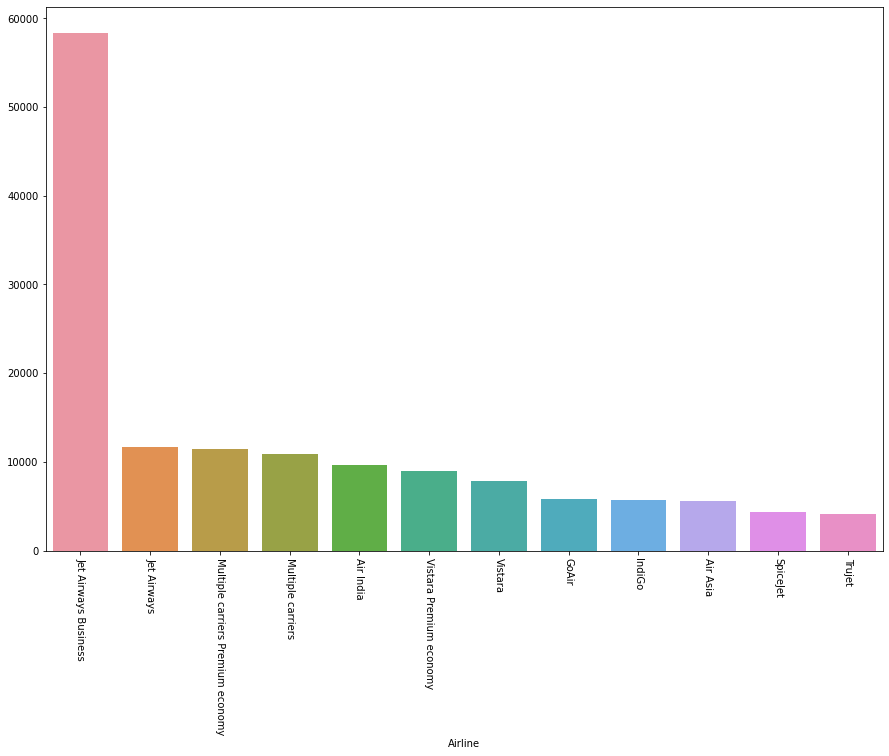

In [28]:
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270)

Jet Airways Business has the highest price with Trujet having the lowest

<function matplotlib.pyplot.show(close=None, block=None)>

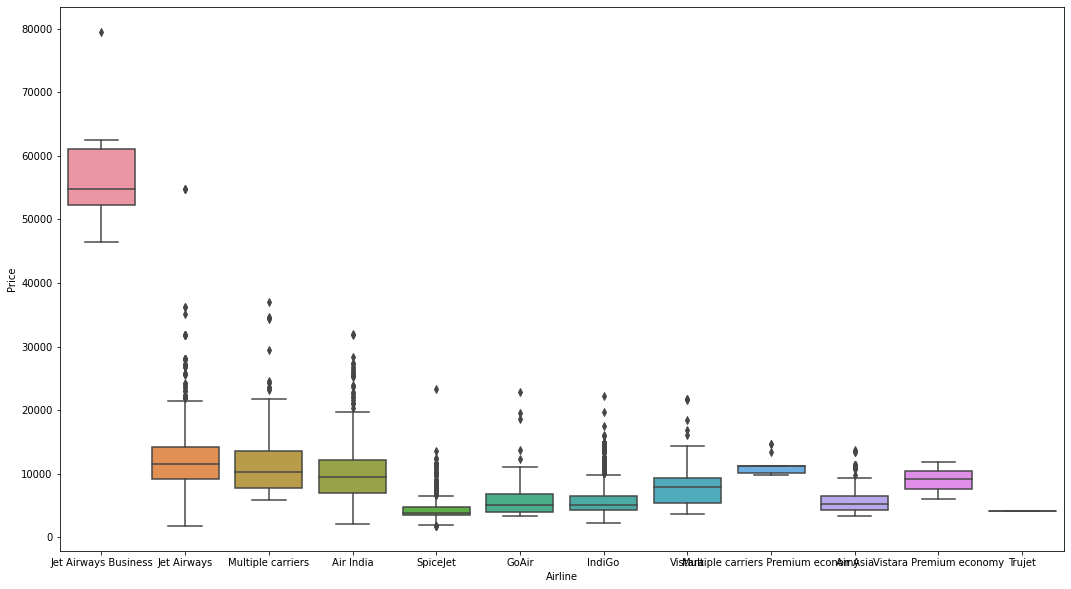

In [29]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show

# Price based on number of stops

In [30]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

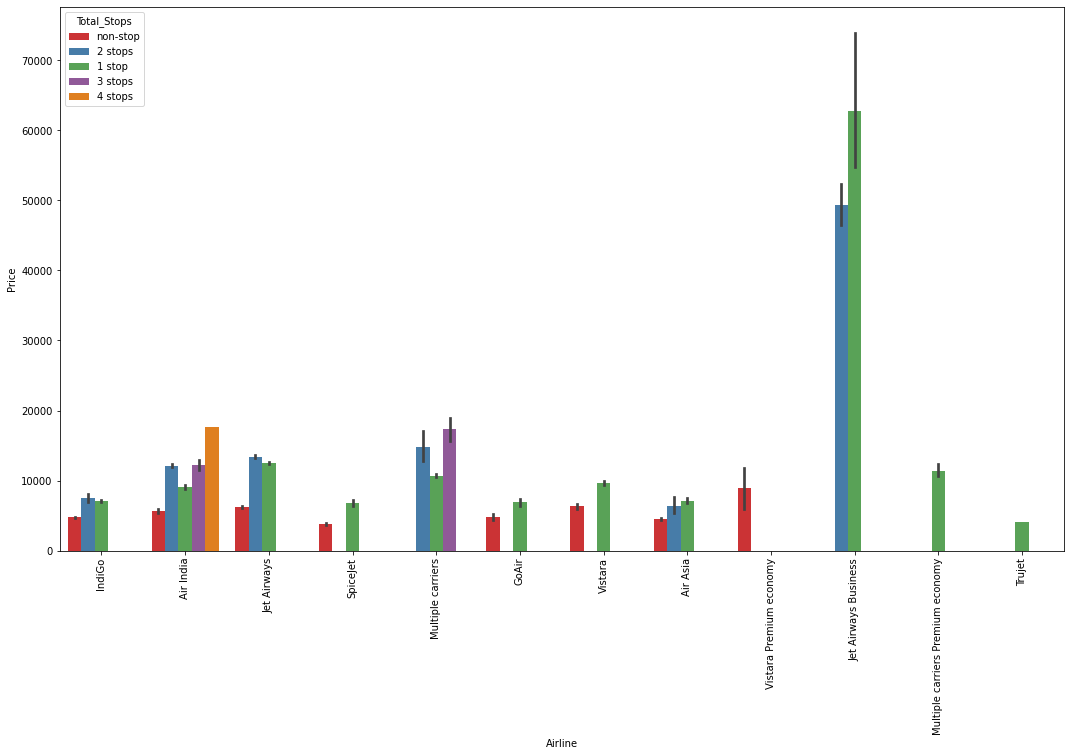

In [31]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

One stop and two stpos Jet Airways Business is having the highest price

In [32]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

# Source vs Price

<function matplotlib.pyplot.show(close=None, block=None)>

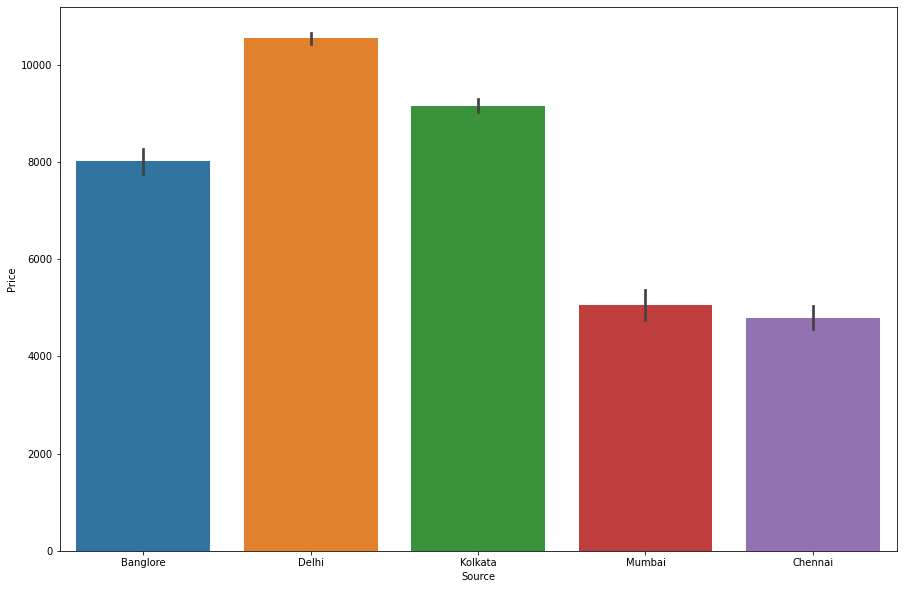

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show

# Destination vs Price

<function matplotlib.pyplot.show(close=None, block=None)>

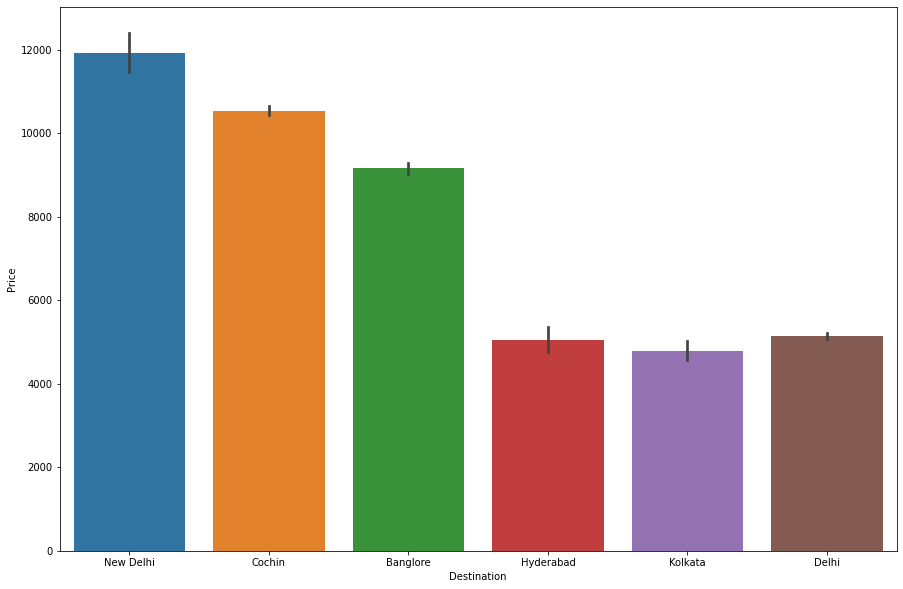

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [35]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [36]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [37]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

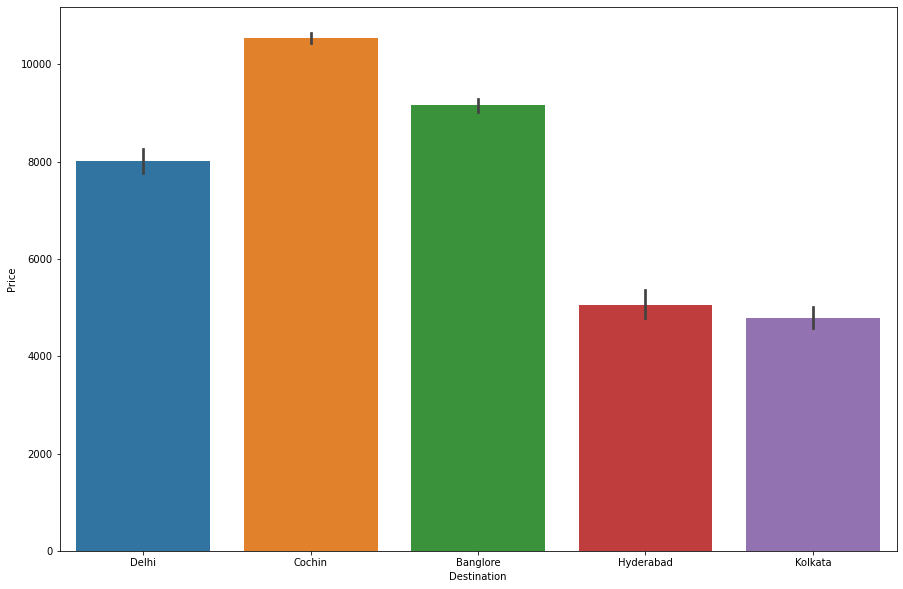

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [39]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:>

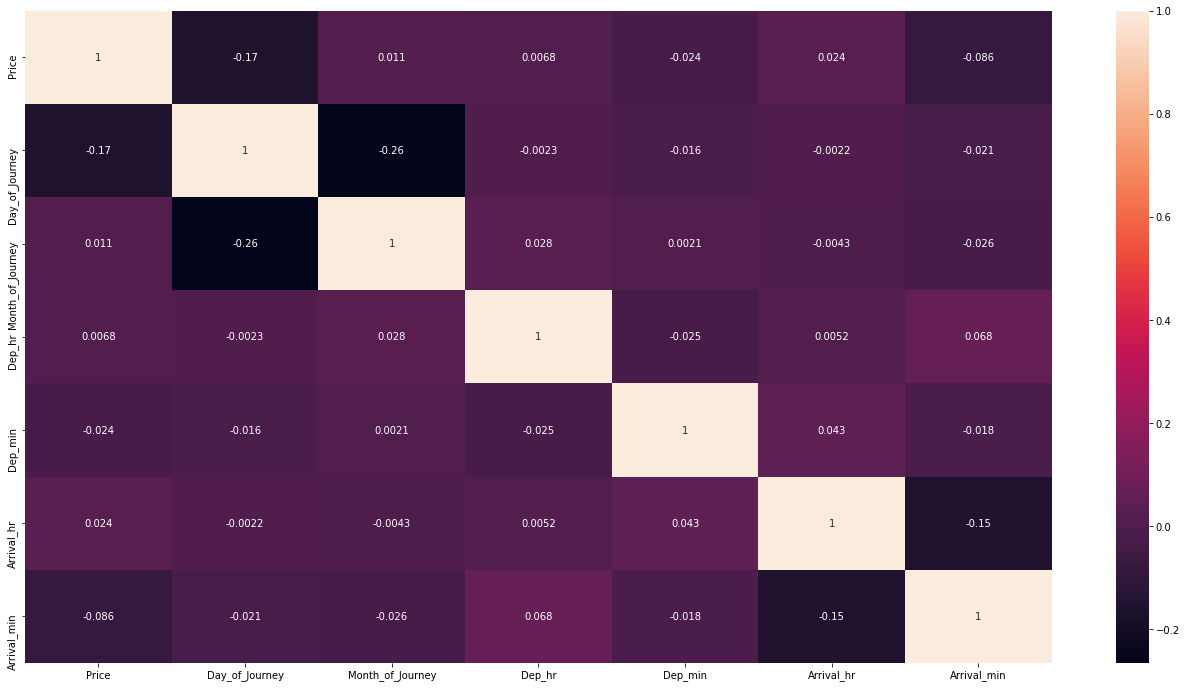

In [40]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True)

The features are less correlated which is a good thing for us to avoid Multicollinearity

# Apply Onehot Encoding on the categorical variables

In [41]:
#Handling Categorical Values 
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [42]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [43]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [44]:
df.shape

(10682, 31)

# Test Data

In [45]:
df_test=pd.read_excel("Test_set.xlsx")

In [46]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Perform same steps that were done for train data 

In [47]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

In [48]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [49]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)


train_shape (10682, 31)
test_shape (2671, 28)


In [50]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [51]:
x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']

In [52]:
x.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,00


## Model Building and Hyperparameter Tuning

ExtraTreesRegressor

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor()

Future Importance

<AxesSubplot:>

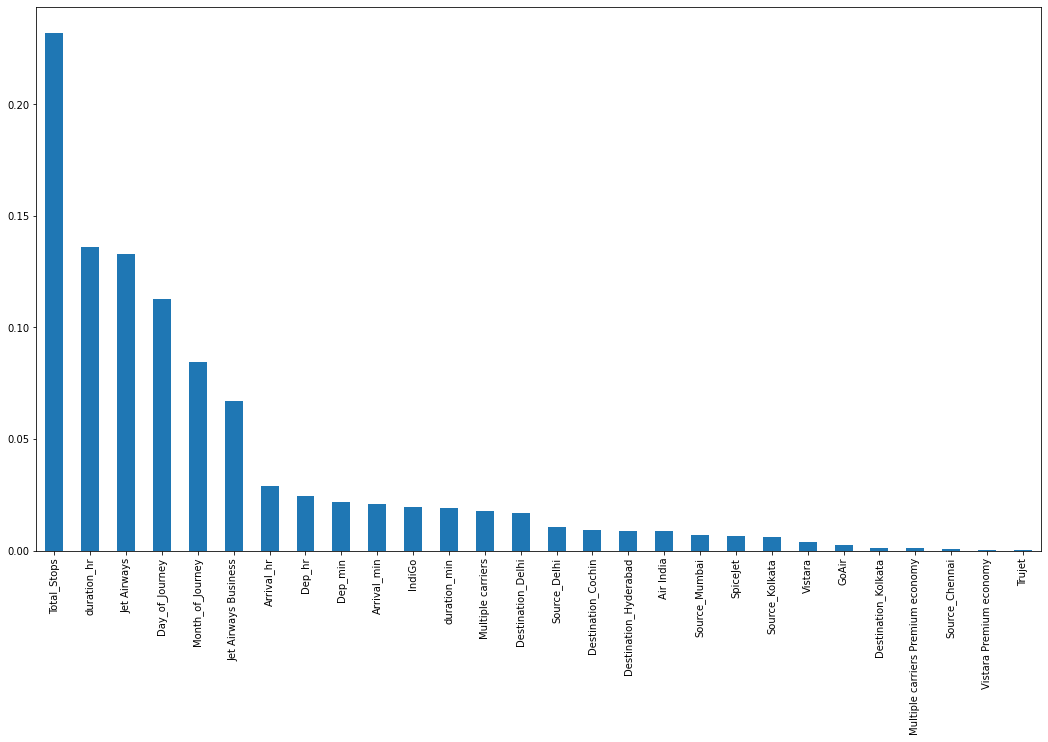

In [54]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

In [55]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [56]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7699391504784471

In [57]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.7939220300020928

Hyperparameter

In [58]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)

In [59]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [60]:
rf_pred=rCV.predict(X_test)
rf_pred

array([12486.26647445,  4288.23462952,  6151.95713824, ...,
       11657.76448522,  9705.40420638,  8643.4466517 ])

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1153.82894305524
MSE 3955758.9554033657


In [62]:
r2_score(y_test,rf_pred)

0.8073526111427718

In [63]:
# !pip install catboost

In [64]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.05718
0:	learn: 4466.5316537	total: 144ms	remaining: 2m 24s
1:	learn: 4319.1952920	total: 147ms	remaining: 1m 13s
2:	learn: 4170.0874200	total: 151ms	remaining: 50.1s
3:	learn: 4033.1061207	total: 154ms	remaining: 38.4s
4:	learn: 3909.5332929	total: 158ms	remaining: 31.4s
5:	learn: 3788.8771850	total: 161ms	remaining: 26.6s
6:	learn: 3677.5795256	total: 163ms	remaining: 23.2s
7:	learn: 3585.9715553	total: 166ms	remaining: 20.6s
8:	learn: 3499.6424958	total: 169ms	remaining: 18.6s
9:	learn: 3408.9602975	total: 172ms	remaining: 17s
10:	learn: 3329.4018172	total: 175ms	remaining: 15.7s
11:	learn: 3258.4306577	total: 178ms	remaining: 14.6s
12:	learn: 3188.9732731	total: 181ms	remaining: 13.7s
13:	learn: 3126.6519374	total: 184ms	remaining: 12.9s
14:	learn: 3064.8092738	total: 187ms	remaining: 12.3s
15:	learn: 3011.9738031	total: 190ms	remaining: 11.7s
16:	learn: 2960.0953295	total: 193ms	remaining: 11.2s
17:	learn: 2917.5532184	total: 196ms	remaining: 10.7s
18:	learn

176:	learn: 1918.1069516	total: 673ms	remaining: 3.13s
177:	learn: 1916.2214512	total: 676ms	remaining: 3.12s
178:	learn: 1913.5124519	total: 680ms	remaining: 3.12s
179:	learn: 1911.4800432	total: 683ms	remaining: 3.11s
180:	learn: 1909.3957573	total: 686ms	remaining: 3.1s
181:	learn: 1908.4135607	total: 689ms	remaining: 3.1s
182:	learn: 1906.5491885	total: 692ms	remaining: 3.09s
183:	learn: 1904.6147159	total: 695ms	remaining: 3.08s
184:	learn: 1903.7135890	total: 698ms	remaining: 3.07s
185:	learn: 1902.4011221	total: 701ms	remaining: 3.07s
186:	learn: 1901.0717891	total: 704ms	remaining: 3.06s
187:	learn: 1899.6407868	total: 706ms	remaining: 3.05s
188:	learn: 1898.5577875	total: 709ms	remaining: 3.04s
189:	learn: 1897.2225162	total: 712ms	remaining: 3.03s
190:	learn: 1895.2033936	total: 714ms	remaining: 3.02s
191:	learn: 1893.4908193	total: 717ms	remaining: 3.02s
192:	learn: 1893.0729664	total: 720ms	remaining: 3.01s
193:	learn: 1891.4099192	total: 723ms	remaining: 3s
194:	learn: 189

364:	learn: 1702.4788415	total: 1.21s	remaining: 2.1s
365:	learn: 1700.6380273	total: 1.21s	remaining: 2.1s
366:	learn: 1698.9732681	total: 1.21s	remaining: 2.09s
367:	learn: 1698.4934176	total: 1.22s	remaining: 2.09s
368:	learn: 1697.8317250	total: 1.22s	remaining: 2.08s
369:	learn: 1697.6146189	total: 1.22s	remaining: 2.08s
370:	learn: 1696.4908709	total: 1.23s	remaining: 2.08s
371:	learn: 1695.3707016	total: 1.23s	remaining: 2.07s
372:	learn: 1694.4249800	total: 1.23s	remaining: 2.07s
373:	learn: 1692.8636708	total: 1.23s	remaining: 2.06s
374:	learn: 1691.9105426	total: 1.24s	remaining: 2.06s
375:	learn: 1691.0001079	total: 1.24s	remaining: 2.06s
376:	learn: 1689.3539822	total: 1.24s	remaining: 2.05s
377:	learn: 1688.5976712	total: 1.24s	remaining: 2.05s
378:	learn: 1687.3608479	total: 1.25s	remaining: 2.04s
379:	learn: 1687.2498993	total: 1.25s	remaining: 2.04s
380:	learn: 1686.3166885	total: 1.25s	remaining: 2.04s
381:	learn: 1685.3745620	total: 1.26s	remaining: 2.03s
382:	learn: 

554:	learn: 1572.1456153	total: 1.75s	remaining: 1.4s
555:	learn: 1571.5981772	total: 1.75s	remaining: 1.4s
556:	learn: 1571.1349874	total: 1.75s	remaining: 1.39s
557:	learn: 1570.5098133	total: 1.75s	remaining: 1.39s
558:	learn: 1569.4602782	total: 1.76s	remaining: 1.39s
559:	learn: 1568.5203017	total: 1.76s	remaining: 1.38s
560:	learn: 1568.0813176	total: 1.76s	remaining: 1.38s
561:	learn: 1567.0769469	total: 1.77s	remaining: 1.38s
562:	learn: 1567.0696187	total: 1.77s	remaining: 1.37s
563:	learn: 1566.6670831	total: 1.77s	remaining: 1.37s
564:	learn: 1566.2504390	total: 1.77s	remaining: 1.36s
565:	learn: 1566.1996582	total: 1.78s	remaining: 1.36s
566:	learn: 1565.2957164	total: 1.78s	remaining: 1.36s
567:	learn: 1564.4645508	total: 1.78s	remaining: 1.35s
568:	learn: 1563.7485387	total: 1.78s	remaining: 1.35s
569:	learn: 1563.2254266	total: 1.79s	remaining: 1.35s
570:	learn: 1562.7083823	total: 1.79s	remaining: 1.35s
571:	learn: 1562.4788015	total: 1.79s	remaining: 1.34s
572:	learn: 

744:	learn: 1476.0905853	total: 2.28s	remaining: 780ms
745:	learn: 1475.7560802	total: 2.28s	remaining: 777ms
746:	learn: 1475.5600092	total: 2.28s	remaining: 774ms
747:	learn: 1475.5550884	total: 2.29s	remaining: 771ms
748:	learn: 1475.2031736	total: 2.29s	remaining: 767ms
749:	learn: 1474.7343241	total: 2.29s	remaining: 764ms
750:	learn: 1474.3655389	total: 2.29s	remaining: 761ms
751:	learn: 1474.0582962	total: 2.3s	remaining: 758ms
752:	learn: 1473.7466707	total: 2.3s	remaining: 755ms
753:	learn: 1473.5724441	total: 2.3s	remaining: 752ms
754:	learn: 1473.2367642	total: 2.31s	remaining: 749ms
755:	learn: 1472.7266545	total: 2.31s	remaining: 746ms
756:	learn: 1472.7226038	total: 2.31s	remaining: 742ms
757:	learn: 1472.7187060	total: 2.31s	remaining: 739ms
758:	learn: 1472.3058197	total: 2.32s	remaining: 736ms
759:	learn: 1472.0110004	total: 2.32s	remaining: 733ms
760:	learn: 1471.5231324	total: 2.32s	remaining: 729ms
761:	learn: 1471.5209949	total: 2.32s	remaining: 726ms
762:	learn: 1

935:	learn: 1413.3011488	total: 2.81s	remaining: 192ms
936:	learn: 1412.9309881	total: 2.82s	remaining: 189ms
937:	learn: 1412.9093580	total: 2.82s	remaining: 186ms
938:	learn: 1412.6984716	total: 2.82s	remaining: 183ms
939:	learn: 1412.4241309	total: 2.82s	remaining: 180ms
940:	learn: 1412.1012221	total: 2.83s	remaining: 177ms
941:	learn: 1411.8666136	total: 2.83s	remaining: 174ms
942:	learn: 1411.3555451	total: 2.83s	remaining: 171ms
943:	learn: 1411.2194518	total: 2.84s	remaining: 168ms
944:	learn: 1410.7058195	total: 2.84s	remaining: 165ms
945:	learn: 1410.2869816	total: 2.84s	remaining: 162ms
946:	learn: 1410.1688619	total: 2.85s	remaining: 159ms
947:	learn: 1409.9576388	total: 2.85s	remaining: 156ms
948:	learn: 1409.7019315	total: 2.85s	remaining: 153ms
949:	learn: 1409.5539003	total: 2.85s	remaining: 150ms
950:	learn: 1409.4242917	total: 2.86s	remaining: 147ms
951:	learn: 1409.1164346	total: 2.86s	remaining: 144ms
952:	learn: 1408.9998123	total: 2.86s	remaining: 141ms
953:	learn

In [65]:
cat_pred=cat.predict(X_test)

In [66]:
r2_score(y_test,cat_pred)

0.8301928561140887

In [67]:
# !pip install lightgbm

In [68]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [69]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor()

In [70]:
lgb_pred=lgb_model.predict(X_test)
r2_score(y_test,lgb_pred)

0.8030064936005559

In [71]:
# !pip install xgboost

In [72]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

0.8212496825906317

In [73]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [74]:
# #Use pickle to save our model so that we can use it later

# import pickle 
# # Saving model to disk
# pickle.dump(CAT_Model, open('model.pkl','wb'))
# model=pickle.load(open('model.pkl','rb'))

In [75]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [76]:
deploy_df=df.drop(['Route','Additional_Info'],axis=1)

In [77]:
deploy_df.to_csv('deploy_df')